In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from hypnn.neuralnetwork import Variable, Operation, NeuralNetwork
from hypnn.gui.mpldraw import MplHypergraph

In [3]:
g = NeuralNetwork()
# Create scalar variables x, y, z, w, v
x = g.add_vertex(Variable((3,), value=np.array([42, 11, 2]), name='x'))
y = g.add_vertex(Variable((3,), value=np.array([64, 3, 12]), name='y'))
w = g.add_vertex(Variable((3,), value=np.array([2, 21, 7]), name='w'))
z = g.add_vertex(Variable((3, ), name='z'))
v = g.add_vertex(Variable((3, ), name='v'))

In [4]:
# Create an addition operation x + y = z
def add(args):
    x, y = args
    return [x + y]
# Reverse derivative R[+]
# dx = (dx/dz)(dL/dz) = dL/dz
def Radd(args):
    x, y, dLdz = args
    dx = dLdz
    dy = dLdz
    return [dx, dy]

g.add_edge(Operation(add, [x, y], [z], reverse_derivative=Radd, label='+'))

0

In [5]:
# Create element-wise multiplication operation z * w = v
def mul(args):
    x, y = args
    return [x * y]
# Reverse derivative R[*]
# dx = (dx/dz)(dL/dz) = y•dL/dz
def Rmul(args):
    x, y, dLdz = args
    dx = dLdz @ np.diag(y)
    dy = dLdz @ np.diag(x)
    return [dx, dy]

g.add_edge(Operation(mul, [z, w], [v], reverse_derivative=Rmul, label='*'))

1

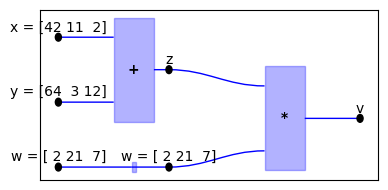

In [6]:
g.inputs = [x, y, w]
g.outputs = [v]
g_mpl = MplHypergraph(g, annotate_vertices=True)
g_mpl.draw(figsize=(4, 2))

- NB the addition of identity operations is only for drawing, and does not occur during computation

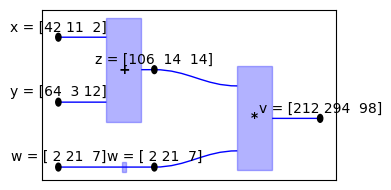

In [7]:
g.compute()
g_mpl = MplHypergraph(g, annotate_vertices=True)
g_mpl.draw(figsize=(4, 2))

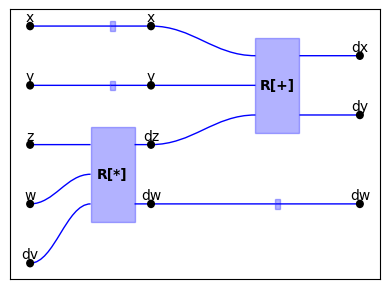

In [8]:
Rg = g.reverse_derivative()
Rg_mpl = MplHypergraph(Rg, annotate_vertices=True)
Rg_mpl.draw(figsize=(4, 3))

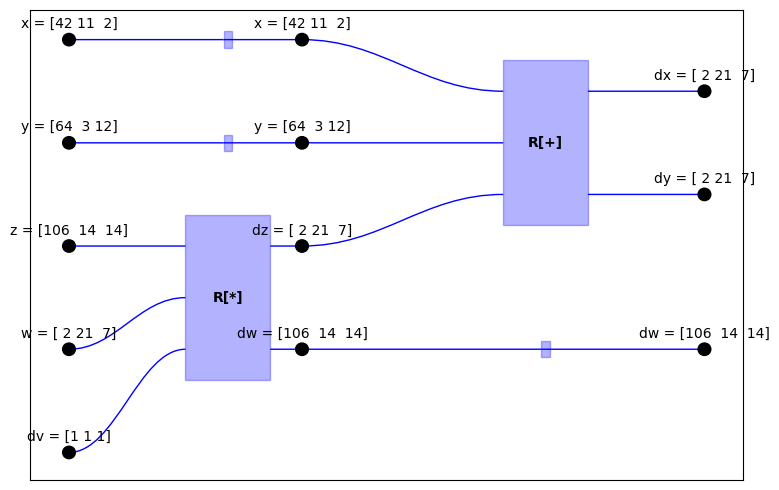

In [11]:
# Compute derivatives wrt v
dv = np.ones_like(g.vertices[v].value)
Rg.vertices[Rg.inputs[0]].set_value(g.vertices[x].value)
Rg.vertices[Rg.inputs[1]].set_value(g.vertices[y].value)
Rg.vertices[Rg.inputs[2]].set_value(g.vertices[z].value)
Rg.vertices[Rg.inputs[3]].set_value(g.vertices[w].value)
Rg.vertices[Rg.inputs[4]].set_value(dv)
Rg.compute()
Rg_mpl = MplHypergraph(Rg, annotate_vertices=True)
Rg_mpl.draw(figsize=(8, 5))